# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Berkshire Hataway.) using the past 60 day stock price.

In [198]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [201]:
#Get the stock quote 
df = web.DataReader('BRK-B', data_source='yahoo', start='2000-01-01', end='2020-08-05') 
#Show the data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,36.580002,34.820000,36.500000,35.299999,875000.0,35.299999
2000-01-04,34.660000,33.900002,34.500000,34.080002,1380000.0,34.080002
2000-01-05,35.459999,33.900002,34.139999,34.639999,995000.0,34.639999
2000-01-06,36.080002,34.540001,34.900002,36.080002,915000.0,36.080002
2000-01-07,36.959999,36.099998,36.599998,36.400002,1000000.0,36.400002
...,...,...,...,...,...,...
2020-07-30,194.570007,192.250000,193.429993,194.300003,4819600.0,194.300003
2020-07-31,196.000000,193.330002,195.059998,195.779999,5936500.0,195.779999
2020-08-03,200.679993,196.000000,197.279999,199.259995,6251000.0,199.259995


In [202]:
df.isna().sum().values,df.shape

(array([0, 0, 0, 0, 0, 0]), (5181, 6))

Create a graph to visualize the data.

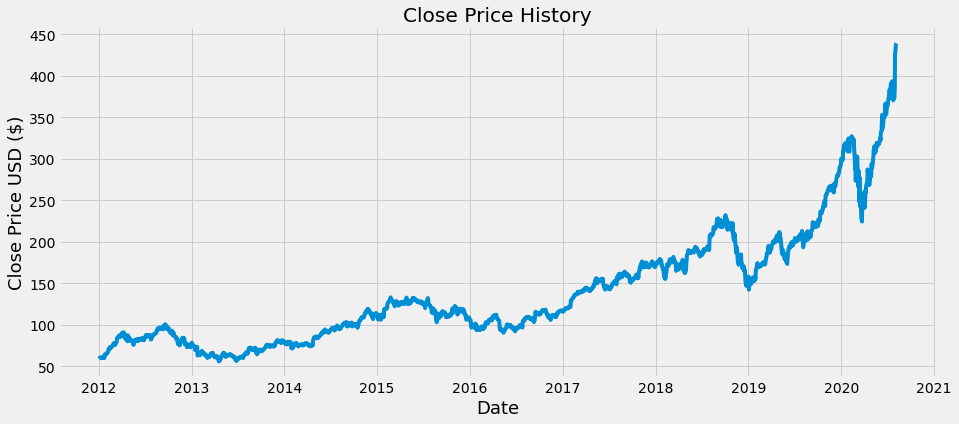

In [173]:
# df["High"].plot()
#Visualize the closing price history
plt.figure(figsize=(14,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

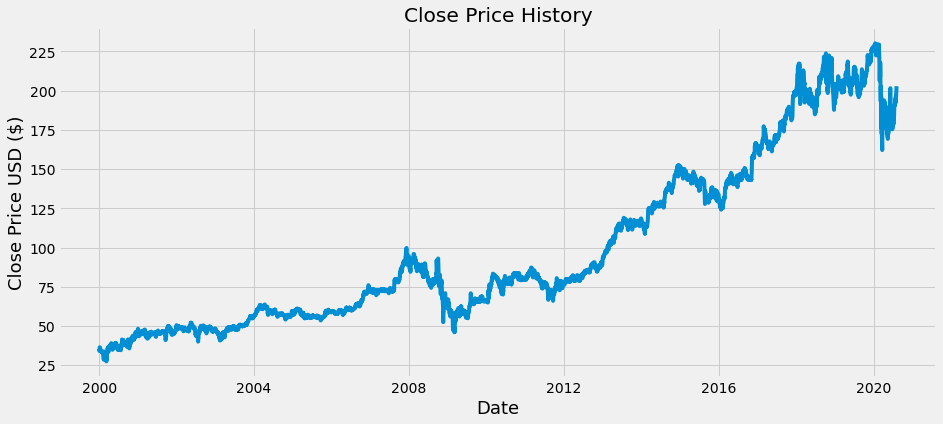

In [203]:
# df["High"].plot()
#Visualize the closing price history
plt.figure(figsize=(14,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [204]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

In [205]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.03895463],
       [0.03293887],
       [0.0357002 ],
       ...,
       [0.84743588],
       [0.85226828],
       [0.86513811]])

In [206]:
dataset.shape,scaled_data.shape

((5181, 1), (5181, 1))

In [207]:
df.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,36.580002,34.820000,36.500000,35.299999,875000.0,35.299999
2000-01-04,34.660000,33.900002,34.500000,34.080002,1380000.0,34.080002
2000-01-05,35.459999,33.900002,34.139999,34.639999,995000.0,34.639999
2000-01-06,36.080002,34.540001,34.900002,36.080002,915000.0,36.080002
2000-01-07,36.959999,36.099998,36.599998,36.400002,1000000.0,36.400002


In [208]:
df[["Close"]].values[2,0]

34.63999938964844

In [209]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [210]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [211]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train

array([[[0.03895463],
        [0.03293887],
        [0.0357002 ],
        ...,
        [0.04230769],
        [0.03353058],
        [0.02928994]],

       [[0.03293887],
        [0.0357002 ],
        [0.0428008 ],
        ...,
        [0.03353058],
        [0.02928994],
        [0.02928994]],

       [[0.0357002 ],
        [0.0428008 ],
        [0.04437871],
        ...,
        [0.02928994],
        [0.02928994],
        [0.03639053]],

       ...,

       [[0.56158775],
        [0.56459564],
        [0.56735704],
        ...,
        [0.56503948],
        [0.55882642],
        [0.56346154]],

       [[0.56459564],
        [0.56735704],
        [0.56449707],
        ...,
        [0.55882642],
        [0.56346154],
        [0.57263314]],

       [[0.56735704],
        [0.56449707],
        [0.57391516],
        ...,
        [0.56346154],
        [0.57263314],
        [0.57465485]]])

In [212]:
x_train.shape

(4085, 60, 1)

## Build the LSTM model to have two LSTM layers with 50 neurons and two Dense layers, one with 25 neurons and the other with 1 neuron.

In [213]:
from keras.layers import Dropout

In [214]:
#Build the LSTM network model
model = Sequential()

# LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=25))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units=1))

In [215]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [216]:
#Train the model
model.fit(x_train, y_train, batch_size=35, epochs=10)

Epoch 1/10
117/117 [==============================] - 3s 25ms/step - loss: 0.0050
Epoch 2/10
117/117 [==============================] - 3s 24ms/step - loss: 0.0017
Epoch 3/10
117/117 [==============================] - 3s 24ms/step - loss: 0.0013
Epoch 4/10
117/117 [==============================] - 3s 24ms/step - loss: 0.0011
Epoch 5/10
117/117 [==============================] - 3s 24ms/step - loss: 0.0010
Epoch 6/10
117/117 [==============================] - 3s 24ms/step - loss: 9.5639e-04
Epoch 7/10
117/117 [==============================] - 3s 24ms/step - loss: 8.5437e-04
Epoch 8/10
117/117 [==============================] - 3s 24ms/step - loss: 8.5882e-04
Epoch 9/10
117/117 [==============================] - 3s 25ms/step - loss: 8.1649e-04
Epoch 10/10
117/117 [==============================] - 3s 27ms/step - loss: 7.2577e-04


In [217]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [218]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [219]:
x_test

array([[0.56449707, 0.57391516, 0.57110455, ..., 0.57263314, 0.57465485,
        0.58471399],
       [0.57391516, 0.57110455, 0.56114398, ..., 0.57465485, 0.58471399,
        0.55379689],
       [0.57110455, 0.56114398, 0.56360946, ..., 0.58471399, 0.55379689,
        0.54783038],
       ...,
       [0.72031557, 0.73683434, 0.72603551, ..., 0.83338267, 0.82297833,
        0.83027614],
       [0.73683434, 0.72603551, 0.71701183, ..., 0.82297833, 0.83027614,
        0.84743588],
       [0.72603551, 0.71701183, 0.70596652, ..., 0.83027614, 0.84743588,
        0.85226828]])

In [220]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [221]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [222]:
predictions

array([[142.07283],
       [142.18805],
       [142.0169 ],
       ...,
       [191.98958],
       [192.66295],
       [193.45862]], dtype=float32)

In [223]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

5.148745697656558

## PLot the result 

/home/funnyeoman/python-environments/yeo/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


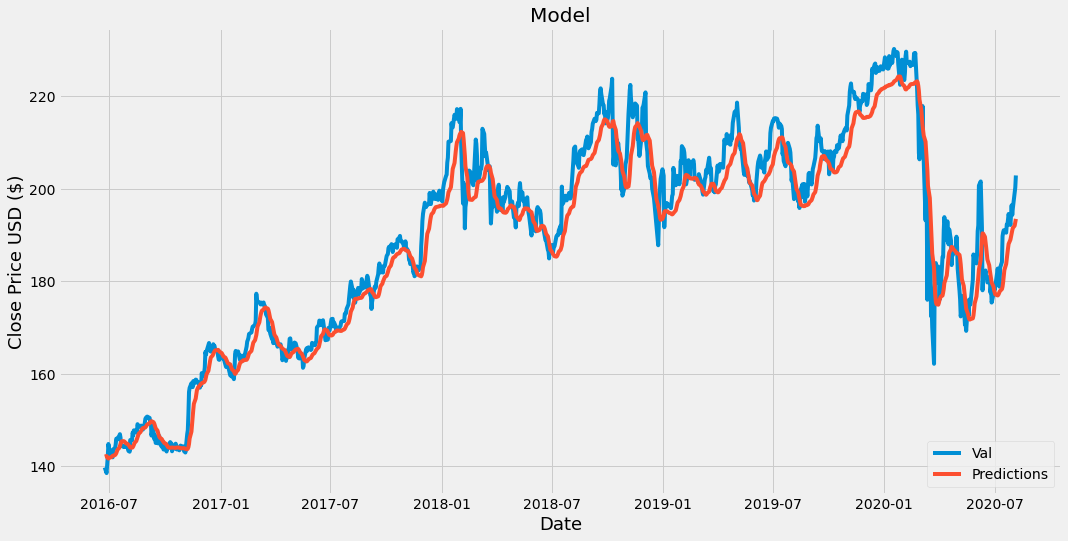

In [224]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
# plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend([ 'Val', 'Predictions'], loc='lower right')
plt.show()

## Show Y vs Ypred

In [225]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2016-06-24,139.710007,142.072830
2016-06-27,138.500000,142.188049
2016-06-28,140.279999,142.016907
2016-06-29,142.119995,141.785202
2016-06-30,144.789993,141.647980
...,...,...
2020-07-30,194.300003,190.954254
2020-07-31,195.779999,191.486832
2020-08-03,199.259995,191.989578
